# Task 2e Solution

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
sci = np.load('data/detection_sci.npy') # read detection sci image
wht = np.load('data/detection_wht.npy') # read detection wht image

--- cut out a portion of the image for analysis

In [3]:
x = 3100 # x-center of the image
y = 1800 # y-center of the image
r = 200 # width/2 of cutout, must be int

In [4]:
sci = sci[x-r:x+r, y-r:y+r] # cutout a portion of the science image
wht = wht[x-r:x+r, y-r:y+r] # cutout a portion of the weight image

--- define the noise in each pixel and make a significance map (signal/noise)

In [5]:
noise = 1./np.sqrt(wht) # conversion from weight to noise
sig = sci/noise # signifance map

--- now run segmentation on the image

In [6]:
from photutils import detect_sources

In [7]:
threshold = 2.5
npixels = 5

In [8]:
segm = detect_sources(sig, threshold, npixels)

--- now measure the flux in every source

In [9]:
fluxes = np.array([np.sum(sci[np.where(segm.data == i+1)]) for i in range(segm.nlabels)])

In [10]:
from photutils import deblend_sources

In [11]:
segm_deblend = deblend_sources(sig, segm, npixels=npixels, nlevels=32, contrast=0.001)

In [12]:
fluxes_deblended = np.array([np.sum(sci[np.where(segm_deblend.data == i+1)]) for i in range(segm_deblend.nlabels)])

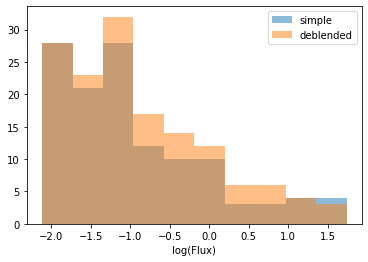

In [13]:
plt.hist(np.log10(fluxes), bins=10, alpha = 0.5, label = 'simple')
plt.hist(np.log10(fluxes_deblended), bins=10, alpha = 0.5, label = 'deblended')
plt.xlabel('log(Flux)')
plt.legend()
plt.show()